In [1]:
import pandas as pd
from datetime import datetime, timedelta
import locale
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configurando o idioma para português do Brasil
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

## TODO: Adicionar Coluna Região e buscar informações de dado de consumo por pessoa

'pt_BR.UTF-8'

### Artigos referência para consumo de água

<details>
<summary> Fatores que influênciam no consumo de água em Joinville</summary>

1. Média de consumo de água por pessoa por dia em predios é 114.62L (11.462m³).
2. Os valores de máximo e o mínimo foram 268.00L e 42.84L, respectivamente.
3. O estudo foi feito em 89 predios, com um total de 3171 unidades residenciais e 9112 habitantes nesses predios

 - [link para o artigo](https://www.sciencedirect.com/science/article/abs/pii/S0959652618304050)

</details>



### Funções

In [2]:
def gerar_consumo_hora(**kargs) -> pd.DataFrame:
    quantidade_de_pessoas = kargs.get("quantidade_de_pessoas", 3)
    lim_inf_dia, lim_sup_dia = kargs.get("limite_consumo_dia", (0.10, 0.6))
    lim_inf_noite, lim_sup_noite = kargs.get("limite_consumo_noite", (0.05, 0.3))
    lim_inf_madrugada, lim_sup_madrugada = kargs.get(
        "limite_consumo_madrugada", (0.01, 0.1)
    )
    hora_atual = kargs.get("hora_atual", datetime.now().hour)
    
    # Ajustando os limites de consumo de acordo com a quantidade de pessoas
    lim_inf_dia = lim_inf_dia * quantidade_de_pessoas
    lim_sup_dia = lim_sup_dia * quantidade_de_pessoas
    lim_inf_noite = lim_inf_noite * quantidade_de_pessoas
    lim_sup_noite = lim_sup_noite * quantidade_de_pessoas
    lim_inf_madrugada = lim_inf_madrugada * quantidade_de_pessoas
    lim_sup_madrugada = lim_sup_madrugada * quantidade_de_pessoas

    np.random.seed(datetime.now().microsecond)

    if hora_atual >= 6 and hora_atual < 18:
        return round(np.random.uniform(lim_inf_dia, lim_sup_dia), 2)
    elif hora_atual >= 18 and hora_atual < 21:
        return round(np.random.uniform(lim_inf_noite, lim_sup_noite), 2)
    else:
        return round(np.random.uniform(lim_inf_madrugada, lim_sup_madrugada), 2)


def gerar_dados_consumo(**kargs) -> pd.DataFrame:
    num_linhas = kargs.get("num_linhas", 100)
    data_inicial = kargs.get("data_inicial", datetime.now())
    data_atual = datetime(
        data_inicial.year, data_inicial.month, data_inicial.day, data_inicial.hour
    )
    quantidade_de_pessoas = kargs.get("quantidade_de_pessoas", 3)
    regiao = kargs.get("regiao", "Nordeste")

    np.random.seed(datetime.now().microsecond)

    # Listas para armazenar os dados gerados
    anos, meses, dias_da_semana, dias_do_mes, horas = (
        [],
        [],
        [],
        [],
        [],
    )
    qtd_pessoas, consumo_agua = [], []

    # Loop para gerar dados
    for _ in range(num_linhas):
        anos.append(data_atual.year)
        meses.append(data_atual.month)
        dias_da_semana.append(data_atual.strftime("%A"))
        horas.append(data_atual.hour)
        qtd_pessoas.append(quantidade_de_pessoas)

        if meses[-1] in [1, 2, 12]:
            if dias_da_semana[-1] == "Sábado" or dias_da_semana[-1] == "Domingo":
                consumo_agua.append(
                    gerar_consumo_hora(
                        hora_atual=data_atual.hour,
                        limite_consumo_dia=(0.3, 0.8),
                        limite_consumo_noite=(0.06, 0.3),
                        limite_consumo_madrugada=(0.01, 0.1),
                        quantidade_de_pessoas=quantidade_de_pessoas,
                    )
                )
            elif dias_da_semana[-1] == "Sexta-feira":
                consumo_agua.append(
                    gerar_consumo_hora(
                        hora_atual=data_atual.hour,
                        limite_consumo_dia=(0.3, 0.7),
                        limite_consumo_noite=(0.07, 0.4),
                        limite_consumo_madrugada=(0.01, 0.1),
                        quantidade_de_pessoas=quantidade_de_pessoas,
                    )
                )
            else:
                consumo_agua.append(
                    gerar_consumo_hora(
                        hora_atual=data_atual.hour,
                        limite_consumo_dia=(0.25, 0.6),
                        limite_consumo_noite=(0.05, 0.3),
                        limite_consumo_madrugada=(0.01, 0.1),
                        quantidade_de_pessoas=quantidade_de_pessoas,
                    )
                )
        else:
            if dias_da_semana[-1] == "Sábado" or dias_da_semana[-1] == "Domingo":
                consumo_agua.append(
                    gerar_consumo_hora(
                        hora_atual=data_atual.hour,
                        limite_consumo_dia=(0.2, 0.6),
                        limite_consumo_noite=(0.05, 0.25),
                        limite_consumo_madrugada=(0.01, 0.1),
                        quantidade_de_pessoas=quantidade_de_pessoas,
                    )
                )
            elif dias_da_semana[-1] == "Sexta-feira":
                consumo_agua.append(
                    gerar_consumo_hora(
                        hora_atual=data_atual.hour,
                        limite_consumo_dia=(0.10, 0.6),
                        limite_consumo_noite=(0.05, 0.3),
                        limite_consumo_madrugada=(0.01, 0.1),
                        quantidade_de_pessoas=quantidade_de_pessoas,
                    )
                )
            else:
                consumo_agua.append(
                    gerar_consumo_hora(
                        hora_atual=data_atual.hour,
                        limite_consumo_dia=(0.2, 0.5),
                        limite_consumo_noite=(0.05, 0.3),
                        limite_consumo_madrugada=(0.01, 0.1),
                        quantidade_de_pessoas=quantidade_de_pessoas,
                    )
                )

        # Avança para a próxima hora
        data_atual += timedelta(hours=1)

    # Criando um DataFrame com os dados gerados
    dados = pd.DataFrame(
        {
            "ano": anos,
            "mes": meses,
            "dia_semana": dias_da_semana,
            "dia_mes": dias_do_mes,
            "hora": horas,
            "quantidade_pessoas": qtd_pessoas,
            "regiao": regiao,
            "consumo_agua_m3": consumo_agua,
        }
    )

    return dados

### Gerar dados

In [3]:
# Dados completos com 35040 linhas
dados = gerar_dados_consumo(
    num_linhas=35040,
    data_inicial=datetime(2020, 1, 1),
    quantidade_de_pessoas=3,
    regiao="Sul",
)

dados.head()

,ano,mes,dia_semana,dia_mes,hora,quantidade_pessoas,consumo_agua_m3,regiao
0,2020,1,quarta,1,0,3,0.13,Sul
1,2020,1,quarta,1,1,3,0.21,Sul
2,2020,1,quarta,1,2,3,0.26,Sul
3,2020,1,quarta,1,3,3,0.15,Sul
4,2020,1,quarta,1,4,3,0.08,Sul


### Agregar dados por ano e mês

In [4]:
# Dados agregados por ano e mês
dados_agregados = dados.groupby(['ano', 'mes']).agg({'consumo_agua_m3': 'sum'}).reset_index()
dados_agregados.head()

,ano,mes,consumo_agua_m3
0,2020,1,563.16
1,2020,2,525.44
2,2020,3,484.69
3,2020,4,477.75
4,2020,5,486.79


### Visualizar dados de 2022 e 2023

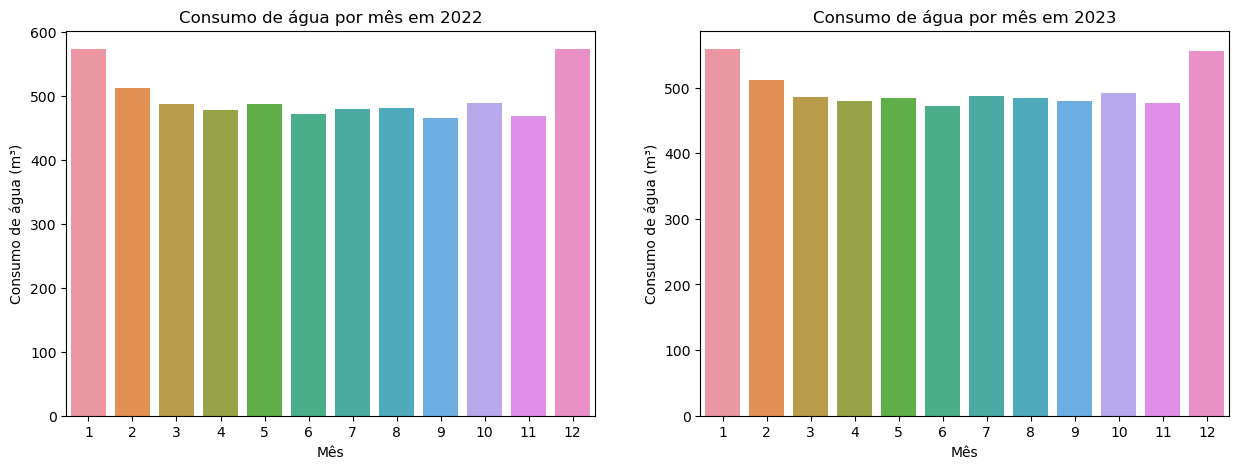

In [5]:
dados_ano_2022 = dados_agregados[dados_agregados['ano'] == 2022]
dados_ano_2023 = dados_agregados[dados_agregados['ano'] == 2023]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].set_title(f'Consumo de água por mês em 2022')
sns.barplot(data=dados_ano_2022, x='mes', y='consumo_agua_m3', ax=axes[0])
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Consumo de água (m³)')

axes[1].set_title(f'Consumo de água por mês em 2023')
sns.barplot(data=dados_ano_2023, x='mes', y='consumo_agua_m3', ax=axes[1])
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Consumo de água (m³)')

plt.show()

### Gerar Rótulos

##### Função para gerar rotulos

In [6]:
def pegar_dados_com_rotulo_consumo(
    dados: pd.DataFrame, gerar_outliers=False
) -> pd.DataFrame:
    copia_dados = dados.copy(deep=True)
    groupby_list = ["mes", "dia_semana", "hora"]
    dados_agrupados = (
        copia_dados.groupby(groupby_list)
        .agg({"consumo_agua_m3": ["mean", "std"]})
        .reset_index()
    )
    rotulos = []

    for _, value in copia_dados.iterrows():
        # Pega o mês, dia da semana, hora e consumo
        mes, dia_semana, hora = value["mes"], value["dia_semana"], value["hora"]
        consumo = value["consumo_agua_m3"]

        # Pegando a média e o desvio padrão de consumo de água baseado no mês, dia da semana e hora
        media_consumo_m3 = dados_agrupados[
            (dados_agrupados["mes"] == mes)
            & (dados_agrupados["dia_semana"] == dia_semana)
            & (dados_agrupados["hora"] == hora)
        ]["consumo_agua_m3"]["mean"].values[0]
        std_consumo_m3 = dados_agrupados[
            (dados_agrupados["mes"] == mes)
            & (dados_agrupados["dia_semana"] == dia_semana)
            & (dados_agrupados["hora"] == hora)
        ]["consumo_agua_m3"]["std"].values[0]

        # Pega o limite superior, limiar para alerta de consumo de água.
        limite_superior_consumo = std_consumo_m3 * 2 + media_consumo_m3

        # Verifica se o consumo é normal ou alto
        if consumo > limite_superior_consumo:
            rotulos.append("Alto")
        else:
            # Se gerar_outliers for verdadeiro, gera outliers aleatórios
            if gerar_outliers:
                np.random.seed(datetime.now().microsecond)
                random_number = np.random.randint(1, 6)

                if random_number == 3:
                    rotulos.append("Alto")
                    novo_consumo = round(
                        np.random.uniform(
                            limite_superior_consumo * 1.5,
                            limite_superior_consumo * 2,
                        ),
                        2,
                    )
                    copia_dados.at[_, "consumo_agua_m3"] = novo_consumo
                else: 
                    rotulos.append("Normal")
            else:
                rotulos.append("Normal")

    copia_dados["padrao_consumo"] = rotulos

    return copia_dados

##### Gerar e visualizar rótulos

In [7]:
dados_com_rotulo = pegar_dados_com_rotulo_consumo(dados, gerar_outliers=True)
dados_com_rotulo.head(50)

,ano,mes,dia_semana,dia_mes,hora,quantidade_pessoas,consumo_agua_m3,regiao,padrao_consumo
0,2020,1,quarta,1,0,3,0.13,Sul,Normal
1,2020,1,quarta,1,1,3,0.21,Sul,Normal
2,2020,1,quarta,1,2,3,0.26,Sul,Normal
3,2020,1,quarta,1,3,3,0.15,Sul,Normal
4,2020,1,quarta,1,4,3,0.62,Sul,Alto
5,2020,1,quarta,1,5,3,0.27,Sul,Normal
6,2020,1,quarta,1,6,3,2.99,Sul,Alto
7,2020,1,quarta,1,7,3,3.03,Sul,Alto
8,2020,1,quarta,1,8,3,1.58,Sul,Normal
9,2020,1,quarta,1,9,3,3.42,Sul,Alto


##### Visualizar distribuição de frequência

In [8]:
dados_com_rotulo['padrao_consumo'].value_counts()

padrao_consumo
Normal    27911
Alto       7129
Name: count, dtype: int64

##### Salvar dados

In [9]:
dados_com_rotulo.to_csv('../data/dados_consumo_agua.csv', index=False)